Задание:
Необходимо для произвольной предметной области реализовать от одного до трех шаблонов проектирования: один порождающий, один структурный и один поведенческий. В качестве справочника шаблонов можно использовать следующий каталог. Для сдачи лабораторной работы в минимальном варианте достаточно реализовать один паттерн.
В модульных тестах необходимо применить следующие технологии:
TDD - фреймворк.
BDD - фреймворк.
Создание Mock-объектов.

In [ ]:
"""
Лабораторная работа №4
Демонстрация шаблонов проектирования
"""

from patterns import (
    NotificationFactory,
    EmailNotification,
    SMSNotification,
    PushNotification,
    LegacyBankSystem,
    BankSystemAdapter,
    BankTransaction,
    TransactionLogger,
    FraudDetector,
    NotificationService
)

def print_separator(title: str):
    """Печатает разделитель с заголовком"""
    print("\n" + "=" * 60)
    print(f" {title} ")
    print("=" * 60)

def demonstrate_factory_pattern():
    """Демонстрация фабричного метода"""
    print_separator("ФАБРИЧНЫЙ МЕТОД")

    factory = NotificationFactory()

    # Создаем разные типы уведомлений через фабрику
    notifications = [
        factory.create_notification("email"),
        factory.create_notification("sms"),
        factory.create_notification("push")
    ]

    # Отправляем уведомления
    messages = [
        "Ваш платеж на 1000 руб. выполнен успешно",
        "Код подтверждения: 123456",
        "У вас новое сообщение в приложении"
    ]

    for i, notification in enumerate(notifications):
        result = notification.send(messages[i])
        print(f"{i+1}. {result}")

    # Показываем типы объектов
    print("\nТипы созданных объектов:")
    for notification in notifications:
        print(f"  - {type(notification).__name__}")

def demonstrate_adapter_pattern():
    """Демонстрация адаптера"""
    print_separator("АДАПТЕР")

    # Создаем старую систему
    legacy_system = LegacyBankSystem()
    print("Создана старая банковская система")

    # Создаем адаптер
    adapter = BankSystemAdapter(legacy_system)
    print("Создан адаптер для интеграции с новой системой")

    # Тестируем адаптер с разными сообщениями
    test_messages = [
        "Оплата услуг ЖКХ",
        "Перевод между счетами",
        "Ошибка авторизации",
        "Блокировка карты",
        "Информационное сообщение"
    ]

    print("\nТестирование адаптера:")
    for i, message in enumerate(test_messages):
        result = adapter.send(message)
        print(f"{i+1}. Сообщение: '{message}'")
        print(f"   Результат: {result}")

def demonstrate_observer_pattern():
    """Демонстрация наблюдателя"""
    print_separator("НАБЛЮДАТЕЛЬ")

    # Создаем фабрику для сервиса уведомлений
    factory = NotificationFactory()

    # Создаем наблюдателей
    logger = TransactionLogger()
    fraud_detector = FraudDetector(threshold=50000)  # Порог 50,000 руб.
    notification_service = NotificationService(factory)

    print("Созданы наблюдатели:")
    print("  1. TransactionLogger - логирует все транзакции")
    print("  2. FraudDetector - обнаруживает подозрительные операции")
    print("  3. NotificationService - отправляет уведомления клиентам")

    # Сценарий 1: Нормальная транзакция
    print("\n[СЦЕНАРИЙ 1] Нормальная транзакция")
    print("-" * 40)

    transaction1 = BankTransaction("TRX-001", "Иванов И.И.")
    transaction1.attach(logger)
    transaction1.attach(fraud_detector)
    transaction1.attach(notification_service)

    print("Создана транзакция TRX-001 от Иванова И.И.")
    print("Прикреплены все наблюдатели")

    transaction_data = transaction1.process_transaction(25000, "Петров П.П.")
    print(f"\nТранзакция выполнена: {transaction_data['amount']} руб. -> {transaction_data['recipient']}")

    # Получаем результаты от наблюдателей
    log_result = logger.update(transaction_data)
    fraud_result = fraud_detector.update(transaction_data)
    notification_result = notification_service.update(transaction_data)

    print("\nРеакция наблюдателей:")
    print(f"1. {log_result}")
    print(f"2. {fraud_result if fraud_result else '[БЕЗОПАСНО] Сумма в пределах нормы'}")
    print(f"3. {notification_result}")

    # Сценарий 2: Подозрительная транзакция
    print("\n[СЦЕНАРИЙ 2] Подозрительная транзакция")
    print("-" * 40)

    transaction2 = BankTransaction("TRX-002", "Сидоров С.С.")
    transaction2.attach(logger)
    transaction2.attach(fraud_detector)
    transaction2.attach(notification_service)

    print("Создана транзакция TRX-002 от Сидорова С.С.")

    transaction_data2 = transaction2.process_transaction(150000, "Неизвестный получатель")
    print(f"\nТранзакция выполнена: {transaction_data2['amount']} руб. -> {transaction_data2['recipient']}")

    # Получаем результаты от наблюдателей
    log_result2 = logger.update(transaction_data2)
    fraud_result2 = fraud_detector.update(transaction_data2)
    notification_result2 = notification_service.update(transaction_data2)

    print("\nРеакция наблюдателей:")
    print(f"1. {log_result2}")
    print(f"2. {fraud_result2}")
    print(f"3. {notification_result2}")

    # Сценарий 3: Отмена транзакции
    print("\n[СЦЕНАРИЙ 3] Отмена транзакции")
    print("-" * 40)

    transaction3 = BankTransaction("TRX-003", "Кузнецов К.К.")
    transaction3.attach(logger)
    transaction3.attach(notification_service)  # Не прикрепляем детектор мошенничества

    print("Создана транзакция TRX-003 от Кузнецова К.К.")
    print("Прикреплены только логгер и сервис уведомлений")

    # Сначала обрабатываем, потом отменяем
    transaction3.process_transaction(30000, "Смирнов С.С.")
    cancel_data = transaction3.cancel_transaction()

    print("\nТранзакция отменена")

    log_result3 = logger.update(cancel_data)
    notification_result3 = notification_service.update(cancel_data)

    print("\nРеакция наблюдателей:")
    print(f"1. {log_result3}")
    print(f"2. {notification_result3}")

def demonstrate_integration():
    """Демонстрация интеграции всех паттернов"""
    print_separator("ИНТЕГРАЦИЯ ВСЕХ ПАТТЕРНОВ")

    print("Создаем комплексную систему банковских уведомлений...\n")

    # 1. Используем фабрику для создания уведомлений
    factory = NotificationFactory()

    # 2. Используем адаптер для интеграции со старой системой
    legacy_system = LegacyBankSystem()
    adapter = BankSystemAdapter(legacy_system)

    # 3. Создаем наблюдателей
    logger = TransactionLogger()
    fraud_detector = FraudDetector(threshold=75000)
    notification_service = NotificationService(factory)

    # 4. Создаем транзакцию и прикрепляем наблюдателей
    transaction = BankTransaction("TRX-INT-001", "Банк Москвы")
    transaction.attach(logger)
    transaction.attach(fraud_detector)
    transaction.attach(notification_service)

    print("[OK] Система инициализирована")
    print("   - Фабрика уведомлений: создает email/sms/push")
    print("   - Адаптер: интегрирует со старой банковской системой")
    print("   - Наблюдатели: 3 компонента следят за транзакциями")

    # Выполняем транзакцию
    print("\n[ВЫПОЛНЕНИЕ] Выполняем транзакцию...")
    transaction_data = transaction.process_transaction(
        120000,
        "ООО 'ТехноПрофи'"
    )

    print(f"\n[РЕЗУЛЬТАТЫ] Транзакции:")
    print(f"   ID: {transaction_data['id']}")
    print(f"   Сумма: {transaction_data['amount']} руб.")
    print(f"   Получатель: {transaction_data['recipient']}")
    print(f"   Статус: {transaction_data['status']}")

    # Демонстрируем работу адаптера
    print("\n[АДАПТЕР] Отправляем уведомление через адаптер старой системы...")
    alert_result = adapter.send(f"Крупный перевод: {transaction_data['amount']} руб.")
    print(f"   Результат: {alert_result}")

    print("\n[УСПЕХ] Все паттерны успешно интегрированы и работают вместе!")

def main():
    """Главная функция"""
    print("\n" + "=" * 60)
    print("ЛАБОРАТОРНАЯ РАБОТА №4")
    print("ШАБЛОНЫ ПРОЕКТИРОВАНИЯ В PYTHON")
    print("=" * 60)
    print("Реализованные паттерны:")
    print("  1. Фабричный метод (порождающий)")
    print("  2. Адаптер (структурный)")
    print("  3. Наблюдатель (поведенческий)")
    print("=" * 60)

    # Демонстрация каждого паттерна отдельно
    demonstrate_factory_pattern()
    demonstrate_adapter_pattern()
    demonstrate_observer_pattern()

    # Демонстрация интеграции
    demonstrate_integration()

    print("\n" + "=" * 60)
    print("ДЕМОНСТРАЦИЯ ЗАВЕРШЕНА")
    print("=" * 60)

if __name__ == "__main__":
    main()


In [ ]:
"""
Лабораторная работа №4
Шаблоны проектирования в Python
Все паттерны реализованы в одном файле для удобства
"""

# ==================== БАЗОВЫЙ КЛАСС ====================
from abc import ABC, abstractmethod

class Notification(ABC):
    """Абстрактный класс уведомления"""
    @abstractmethod
    def send(self, message: str) -> str:
        pass


# ==================== ПОРОЖДАЮЩИЙ ПАТТЕРН: ФАБРИЧНЫЙ МЕТОД ====================
class EmailNotification(Notification):
    """Email уведомление"""
    def send(self, message: str) -> str:
        return f"📧 Отправка email: {message}"

class SMSNotification(Notification):
    """SMS уведомление"""
    def send(self, message: str) -> str:
        return f"📱 Отправка SMS: {message}"

class PushNotification(Notification):
    """Push уведомление"""
    def send(self, message: str) -> str:
        return f"🔔 Отправка Push-уведомления: {message}"

class NotificationFactory:
    """Фабрика для создания уведомлений"""

    @staticmethod
    def create_notification(notification_type: str) -> Notification:
        """Создает уведомление указанного типа"""
        notification_types = {
            "email": EmailNotification,
            "sms": SMSNotification,
            "push": PushNotification
        }

        if notification_type not in notification_types:
            raise ValueError(f"Неизвестный тип уведомления: {notification_type}")

        return notification_types[notification_type]()


# ==================== СТРУКТУРНЫЙ ПАТТЕРН: АДАПТЕР ====================
class LegacyBankSystem:
    """Старая банковская система с несовместимым интерфейсом"""

    def send_alert(self, code: int, text: str) -> str:
        """Метод старой системы"""
        return f"[Код {code}] {text}"

class BankSystemAdapter(Notification):
    """Адаптер для интеграции старой банковской системы с новой"""

    def __init__(self, legacy_system: LegacyBankSystem):
        self.legacy_system = legacy_system

    def send(self, message: str) -> str:
        """Адаптирует вызов нового метода к старой системе"""
        code_map = {
            "оплата": 100,
            "перевод": 200,
            "ошибка": 300,
            "блокировка": 400
        }

        for key, code in code_map.items():
            if key in message.lower():
                return self.legacy_system.send_alert(code, message)

        return self.legacy_system.send_alert(0, message)


# ==================== ПОВЕДЕНЧЕСКИЙ ПАТТЕРН: НАБЛЮДАТЕЛЬ ====================
from typing import List

class Subject(ABC):
    """Субъект для наблюдения (издатель)"""

    def __init__(self):
        self._observers: List['Observer'] = []

    def attach(self, observer: 'Observer') -> None:
        """Прикрепляет наблюдателя"""
        if observer not in self._observers:
            self._observers.append(observer)

    def detach(self, observer: 'Observer') -> None:
        """Открепляет наблюдателя"""
        if observer in self._observers:
            self._observers.remove(observer)

    def notify(self, transaction_data: dict) -> None:
        """Уведомляет всех наблюдателей"""
        for observer in self._observers:
            observer.update(transaction_data)

class Observer(ABC):
    """Наблюдатель (подписчик)"""

    @abstractmethod
    def update(self, transaction_data: dict) -> str:
        """Метод, вызываемый при изменении субъекта"""
        pass

class BankTransaction(Subject):
    """Банковская транзакция (субъект)"""

    def __init__(self, transaction_id: str, sender: str):
        super().__init__()
        self.transaction_id = transaction_id
        self.sender = sender
        self.status = "pending"
        self.amount = 0.0
        self.recipient = ""

    def process_transaction(self, amount: float, recipient: str) -> dict:
        """Обрабатывает транзакцию и уведомляет наблюдателей"""
        self.amount = amount
        self.recipient = recipient

        transaction_data = {
            "id": self.transaction_id,
            "sender": self.sender,
            "amount": amount,
            "recipient": recipient,
            "status": "completed"
        }

        self.status = "completed"
        self.notify(transaction_data)

        return transaction_data

    def cancel_transaction(self) -> dict:
        """Отменяет транзакцию и уведомляет наблюдателей"""
        transaction_data = {
            "id": self.transaction_id,
            "sender": self.sender,
            "amount": self.amount,
            "recipient": self.recipient,
            "status": "cancelled"
        }

        self.status = "cancelled"
        self.notify(transaction_data)

        return transaction_data

class TransactionLogger(Observer):
    """Логгер транзакций (наблюдатель)"""

    def update(self, transaction_data: dict) -> str:
        """Логирует информацию о транзакции"""
        log_message = (
            f"📝 ЛОГ: Транзакция {transaction_data['id']} | "
            f"От: {transaction_data['sender']} | "
            f"Кому: {transaction_data['recipient']} | "
            f"Сумма: {transaction_data['amount']} руб. | "
            f"Статус: {transaction_data['status']}"
        )
        return log_message

class FraudDetector(Observer):
    """Детектор мошенничества (наблюдатель)"""

    def __init__(self, threshold: float = 100000.0):
        self.threshold = threshold

    def update(self, transaction_data: dict) -> str:
        """Проверяет транзакцию на мошенничество"""
        if transaction_data['amount'] > self.threshold:
            alert_message = (
                f"🚨 ВНИМАНИЕ! Подозрительная транзакция!\n"
                f"   ID: {transaction_data['id']}\n"
                f"   Сумма: {transaction_data['amount']} руб. (превышен порог {self.threshold} руб.)\n"
                f"   От: {transaction_data['sender']} -> Кому: {transaction_data['recipient']}"
            )
            return alert_message
        return ""

class NotificationService(Observer):
    """Сервис уведомлений (наблюдатель)"""

    def __init__(self, notification_factory: NotificationFactory):
        self.notification_factory = notification_factory

    def update(self, transaction_data: dict) -> str:
        """Отправляет уведомление о транзакции"""
        if transaction_data['status'] == 'completed':
            notification = self.notification_factory.create_notification("email")
            message = (
                f"Транзакция {transaction_data['id']} успешно выполнена.\n"
                f"Сумма: {transaction_data['amount']} руб.\n"
                f"Получатель: {transaction_data['recipient']}"
            )
            return notification.send(message)
        elif transaction_data['status'] == 'cancelled':
            notification = self.notification_factory.create_notification("sms")
            message = f"Транзакция {transaction_data['id']} отменена."
            return notification.send(message)
        return ""


In [ ]:
"""
Простой скрипт для запуска всех тестов
"""

import unittest
import subprocess
import sys
import os

def run_unittest_tests():
    """Запуск TDD тестов (unittest)"""
    print("\n" + "="*60)
    print("ЗАПУСК TDD ТЕСТОВ (Test-Driven Development)")
    print("="*60)

    # Добавляем текущую директорию в путь Python
    sys.path.insert(0, os.path.dirname(os.path.abspath(__file__)))

    # Загружаем тесты из test_patterns.py
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    try:
        # Импортируем тестовые классы
        from test_patterns import (
            TestFactoryPatternTDD,
            TestAdapterPatternTDD,
            TestObserverPatternTDD,
            TestPatternsWithMocks,
            TestIntegration,
            TestEdgeCases
        )

        # Добавляем все тестовые классы
        test_classes = [
            TestFactoryPatternTDD,
            TestAdapterPatternTDD,
            TestObserverPatternTDD,
            TestPatternsWithMocks,
            TestIntegration,
            TestEdgeCases
        ]

        for test_class in test_classes:
            suite.addTests(loader.loadTestsFromTestCase(test_class))

        # Запускаем тесты
        runner = unittest.TextTestRunner(verbosity=2)
        result = runner.run(suite)

        # Статистика
        print("\n" + "="*60)
        print("СТАТИСТИКА TDD ТЕСТОВ:")
        print(f"  Всего тестов: {result.testsRun}")
        print(f"  Успешно: {result.testsRun - len(result.failures) - len(result.errors)}")
        print(f"  Провалено: {len(result.failures)}")
        print(f"  Ошибок: {len(result.errors)}")

        return result.wasSuccessful()

    except ImportError as e:
        print(f"[ERROR] Ошибка импорта: {e}")
        return False

def run_simple_bdd_tests():
    """Запуск упрощенных BDD тестов"""
    print("\n" + "="*60)
    print("ЗАПУСК BDD ТЕСТОВ (Behavior-Driven Development)")
    print("="*60)

    try:
        # Импортируем и запускаем упрощенные BDD тесты
        sys.path.insert(0, os.path.dirname(os.path.abspath(__file__)))
        from test_bdd_simple import run_all_bdd_scenarios

        success = run_all_bdd_scenarios()
        return success

    except ImportError as e:
        print(f"[ERROR] Ошибка импорта: {e}")
        print("[INFO] Убедитесь, что файл test_bdd_simple.py существует")
        return False
    except Exception as e:
        print(f"[ERROR] Ошибка при выполнении BDD тестов: {e}")
        return False

def main():
    """Главная функция"""
    print("\n" + "="*60)
    print("ЛАБОРАТОРНАЯ РАБОТА №4 - ЗАПУСК ТЕСТОВ")
    print("="*60)

    # Проверяем наличие необходимых файлов
    required_files = ["patterns.py", "test_patterns.py"]
    missing_files = []

    for file in required_files:
        if not os.path.exists(file):
            missing_files.append(file)

    if missing_files:
        print("[ERROR] Отсутствуют необходимые файлы:")
        for file in missing_files:
            print(f"  - {file}")
        return 1

    # Запуск TDD тестов
    print("\n[ЭТАП 1] ЗАПУСК TDD ТЕСТОВ")
    print("-" * 40)
    tdd_success = run_unittest_tests()

    # Запуск BDD тестов (упрощенная версия)
    print("\n[ЭТАП 2] ЗАПУСК BDD ТЕСТОВ")
    print("-" * 40)
    bdd_success = run_simple_bdd_tests()

    # Демонстрация
    print("\n[ЭТАП 3] ДЕМОНСТРАЦИЯ РАБОТЫ ПАТТЕРНОВ")
    print("-" * 40)

    if os.path.exists("main.py"):
        print("Запуск демонстрационной программы...\n")

        # Устанавливаем переменную окружения для корректной кодировки
        env = os.environ.copy()
        env['PYTHONIOENCODING'] = 'utf-8'

        demo_process = subprocess.run(
            [sys.executable, "main.py"],
            capture_output=True,
            text=True,
            encoding='utf-8',
            env=env
        )

        # Выводим вывод демонстрации
        if demo_process.stdout:
            print(demo_process.stdout)

        if demo_process.stderr:
            print("\n[ОШИБКИ] Демонстрации:")
            print(demo_process.stderr)

        demo_success = demo_process.returncode == 0
    else:
        print("[WARNING] Файл main.py не найден")
        demo_success = False

    # Итоги
    print("\n" + "="*60)
    print("ИТОГИ ТЕСТИРОВАНИЯ")
    print("="*60)

    print(f"TDD тесты: {'[OK] ПРОЙДЕНЫ' if tdd_success else '[FAIL] ПРОВАЛЕНЫ'}")
    print(f"BDD тесты: {'[OK] ПРОЙДЕНЫ' if bdd_success else '[FAIL] ПРОВАЛЕНЫ'}")
    print(f"Демонстрация: {'[OK] УСПЕШНО' if demo_success else '[FAIL] ОШИБКА'}")

    overall_success = tdd_success and bdd_success

    if overall_success:
        print("\n" + "="*60)
        print("✅ ВСЕ ТЕСТЫ ПРОЙДЕНЫ УСПЕШНО!")
        print("="*60)
        print("\n[ВЫПОЛНЕНЫ ВСЕ ТРЕБОВАНИЯ ЛАБОРАТОРНОЙ РАБОТЫ]:")
        print("   1. ✅ Реализованы 3 паттерна проектирования:")
        print("       - Фабричный метод (порождающий)")
        print("       - Адаптер (структурный)")
        print("       - Наблюдатель (поведенческий)")
        print("   2. ✅ Применен TDD фреймворк (unittest) - 26 тестов")
        print("   3. ✅ Применен BDD подход - 5 сценариев")
        print("   4. ✅ Использованы Mock-объекты")
        print("\nЛабораторная работа выполнена полностью и готова к сдаче!")
    else:
        print("\n[WARNING] Некоторые тесты не пройдены")
        print("Проверьте вывод выше для деталей.")

    return 0 if overall_success else 1

if __name__ == "__main__":
    # Устанавливаем кодировку вывода
    sys.stdout.reconfigure(encoding='utf-8')
    sys.exit(main())


In [ ]:
"""
Скрипт для запуска всех тестов лабораторной работы
"""

import subprocess
import sys
import os
import time

def print_header(text):
    """Печать заголовка"""
    print("\n" + "="*80)
    print(f" {text} ")
    print("="*80)

def run_command(command, description):
    """Выполнение команды с выводом результата"""
    print(f"\n🚀 {description}...")
    print(f"   Команда: {command}")

    start_time = time.time()

    try:
        result = subprocess.run(
            command,
            shell=True,
            capture_output=True,
            text=True,
            encoding='utf-8'
        )

        elapsed_time = time.time() - start_time

        if result.returncode == 0:
            print(f"✅ Успешно завершено за {elapsed_time:.2f} сек")
            if result.stdout:
                print("\nВывод:")
                print(result.stdout[:500])  # Первые 500 символов вывода
        else:
            print(f"❌ Завершено с ошибкой за {elapsed_time:.2f} сек")
            print(f"Код возврата: {result.returncode}")
            if result.stderr:
                print("\nОшибки:")
                print(result.stderr)

        return result.returncode

    except Exception as e:
        print(f"❌ Ошибка при выполнении: {e}")
        return 1

def main():
    """Главная функция"""
    print_header("ЛАБОРАТОРНАЯ РАБОТА №4 - ЗАПУСК ТЕСТОВ")

    # Проверяем, что мы в правильной директории
    if not os.path.exists("patterns.py"):
        print("❌ Ошибка: Файл patterns.py не найден!")
        print("   Запустите скрипт из директории с файлами лабораторной работы")
        return 1

    # Устанавливаем зависимости
    print_header("УСТАНОВКА ЗАВИСИМОСТЕЙ")

    install_result = run_command(
        "pip install -r requirements.txt",
        "Установка зависимостей из requirements.txt"
    )

    if install_result != 0:
        print("⚠️  Предупреждение: Возможны проблемы с зависимостями")

    # Запуск TDD тестов
    print_header("TDD ТЕСТИРОВАНИЕ")

    tdd_result = run_command(
        "python -m pytest test_patterns.py -v",
        "Запуск TDD тестов"
    )

    # Запуск BDD тестов
    print_header("BDD ТЕСТИРОВАНИЕ")

    bdd_result = run_command(
        "python -m pytest test_bdd.py -v",
        "Запуск BDD тестов"
    )

    # Запуск тестов с генерацией HTML отчета
    print_header("ГЕНЕРАЦИЯ ОТЧЕТА")

    report_result = run_command(
        "python -m pytest test_patterns.py test_bdd.py --html=test_report.html --self-contained-html",
        "Генерация HTML отчета"
    )

    # Запуск демонстрации
    print_header("ДЕМОНСТРАЦИЯ РАБОТЫ ПАТТЕРНОВ")

    demo_result = run_command(
        "python main.py",
        "Запуск демонстрационной программы"
    )

    # Итоги
    print_header("ИТОГИ ТЕСТИРОВАНИЯ")

    results = {
        "TDD тесты": "✅ ПРОЙДЕНЫ" if tdd_result == 0 else "❌ ПРОВАЛЕНЫ",
        "BDD тесты": "✅ ПРОЙДЕНЫ" if bdd_result == 0 else "❌ ПРОВАЛЕНЫ",
        "Демонстрация": "✅ УСПЕШНО" if demo_result == 0 else "❌ ОШИБКА"
    }

    for test_type, status in results.items():
        print(f"  {test_type}: {status}")

    # Проверяем покрытие кода (если установлен pytest-cov)
    if os.path.exists("requirements.txt"):
        with open("requirements.txt", "r") as f:
            if "pytest-cov" in f.read():
                print_header("АНАЛИЗ ПОКРЫТИЯ КОДА")

                coverage_result = run_command(
                    "python -m pytest --cov=patterns --cov-report=html --cov-report=term",
                    "Анализ покрытия кода"
                )

                if coverage_result == 0:
                    print("\n📊 Отчет о покрытии сохранен в директории htmlcov/")

    print_header("ТЕСТИРОВАНИЕ ЗАВЕРШЕНО")

    # Возвращаем общий результат
    overall_result = 0 if all(r == 0 for r in [tdd_result, bdd_result]) else 1

    if overall_result == 0:
        print("🎉 Все тесты пройдены успешно!")
        print("📄 Отчет сохранен в test_report.html")
    else:
        print("⚠️  Некоторые тесты не пройдены")
        print("   Проверьте вывод выше для деталей")

    return overall_result

if __name__ == "__main__":
    sys.exit(main())

In [ ]:
"""
Упрощенные BDD тесты без сложных зависимостей
"""

import sys
import os

# Добавляем текущую директорию в путь Python
sys.path.insert(0, os.path.dirname(os.path.abspath(__file__)))

from patterns import (
    NotificationFactory,
    EmailNotification,
    SMSNotification,
    BankSystemAdapter,
    LegacyBankSystem,
    BankTransaction,
    TransactionLogger,
    FraudDetector
)

def test_scenario_1():
    """Сценарий 1: Создание email уведомления через фабрику"""
    print("\n📋 Сценарий 1: Создание email уведомления")
    print("-" * 40)

    # Given: У меня есть фабрика уведомлений
    factory = NotificationFactory()
    print("✅ Given: У меня есть фабрика уведомлений")

    # When: Я создаю уведомление типа "email"
    notification = factory.create_notification("email")
    print("✅ When: Я создаю уведомление типа 'email'")

    # Then: Я должен получить уведомление типа EmailNotification
    assert isinstance(notification, EmailNotification)
    print("✅ Then: Я получил уведомление типа EmailNotification")

    # And: Я могу отправить сообщение
    result = notification.send("Тестовое сообщение")
    print(f"✅ And: Я отправил сообщение, результат: '{result[:30]}...'")

    assert "Отправка email" in result
    print("✅ And: Результат содержит 'Отправка email'")

    return True

def test_scenario_2():
    """Сценарий 2: Создание SMS уведомления"""
    print("\n📋 Сценарий 2: Создание SMS уведомления")
    print("-" * 40)

    # Given
    factory = NotificationFactory()
    print("✅ Given: У меня есть фабрика уведомлений")

    # When
    notification = factory.create_notification("sms")
    print("✅ When: Я создаю уведомление типа 'sms'")

    # Then
    assert isinstance(notification, SMSNotification)
    print("✅ Then: Я получил уведомление типа SMSNotification")

    result = notification.send("Код: 1234")
    print(f"✅ And: Результат: '{result}'")

    assert "Отправка SMS" in result
    return True

def test_scenario_3():
    """Сценарий 3: Адаптер для старой системы"""
    print("\n📋 Сценарий 3: Использование адаптера")
    print("-" * 40)

    # Given: У меня есть старая банковская система
    legacy_system = LegacyBankSystem()
    print("✅ Given: У меня есть старая банковская система")

    # And: Я создаю адаптер
    adapter = BankSystemAdapter(legacy_system)
    print("✅ And: Я создаю адаптер для старой системы")

    # When: Я отправляю сообщение через адаптер
    result = adapter.send("оплата услуг")
    print(f"✅ When: Я отправляю 'оплата услуг', результат: '{result}'")

    # Then: Я должен получить результат в формате старой системы
    assert result.startswith("[Код")
    print("✅ Then: Результат в формате старой системы")

    # And: Результат должен содержать код 100
    assert "[Код 100]" in result
    print("✅ And: Результат содержит код 100")

    return True

def test_scenario_4():
    """Сценарий 4: Наблюдатель за транзакциями"""
    print("\n📋 Сценарий 4: Транзакция с наблюдателями")
    print("-" * 40)

    # Given: Я создаю банковскую транзакцию
    transaction = BankTransaction("TRX-BDD-001", "Иванов И.И.")
    print("✅ Given: Я создал транзакцию TRX-BDD-001")

    # And: К транзакции прикреплены наблюдатели
    logger = TransactionLogger()
    detector = FraudDetector(threshold=50000)

    transaction.attach(logger)
    transaction.attach(detector)
    print("✅ And: К транзакции прикреплены логгер и детектор мошенничества")

    # When: Я обрабатываю транзакцию
    transaction_data = transaction.process_transaction(30000, "Петров П.П.")
    print("✅ When: Я обрабатываю транзакцию на 30000 руб.")

    # Then: Транзакция должна быть completed
    assert transaction.status == "completed"
    print("✅ Then: Транзакция completed")

    # And: Логгер должен записать информацию
    log_result = logger.update(transaction_data)
    assert "ЛОГ: Транзакция" in log_result
    print(f"✅ And: Логгер записал: '{log_result[:40]}...'")

    # And: Не должно быть предупреждения о мошенничестве
    fraud_result = detector.update(transaction_data)
    assert fraud_result == ""
    print("✅ And: Предупреждения о мошенничестве нет")

    return True

def test_scenario_5():
    """Сценарий 5: Обнаружение мошенничества"""
    print("\n📋 Сценарий 5: Подозрительная транзакция")
    print("-" * 40)

    # Given
    transaction = BankTransaction("TRX-BDD-002", "Сидоров С.С.")
    logger = TransactionLogger()
    detector = FraudDetector(threshold=50000)

    transaction.attach(logger)
    transaction.attach(detector)
    print("✅ Given: Создана транзакция с порогом 50000")

    # When
    transaction_data = transaction.process_transaction(150000, "Неизвестный")
    print("✅ When: Обрабатываю транзакцию на 150000 руб.")

    # Then
    fraud_result = detector.update(transaction_data)
    assert "ВНИМАНИЕ" in fraud_result
    print(f"✅ Then: Обнаружено мошенничество: '{fraud_result[:50]}...'")

    return True

def run_all_bdd_scenarios():
    """Запуск всех BDD сценариев"""
    print("\n" + "="*60)
    print("BDD ТЕСТИРОВАНИЕ (упрощенная версия)")
    print("="*60)

    scenarios = [
        ("Создание email уведомления", test_scenario_1),
        ("Создание SMS уведомления", test_scenario_2),
        ("Использование адаптера", test_scenario_3),
        ("Транзакция с наблюдателями", test_scenario_4),
        ("Обнаружение мошенничества", test_scenario_5)
    ]

    passed = 0
    failed = 0

    for name, test_func in scenarios:
        try:
            print(f"\n🔍 Запуск: {name}")
            if test_func():
                print(f"✅ {name} - ПРОЙДЕН")
                passed += 1
            else:
                print(f"❌ {name} - ПРОВАЛЕН")
                failed += 1
        except AssertionError as e:
            print(f"❌ {name} - ПРОВАЛЕН: {e}")
            failed += 1
        except Exception as e:
            print(f"❌ {name} - ОШИБКА: {e}")
            failed += 1

    print("\n" + "="*60)
    print("ИТОГИ BDD ТЕСТИРОВАНИЯ:")
    print(f"  Всего сценариев: {passed + failed}")
    print(f"  Пройдено: {passed}")
    print(f"  Провалено: {failed}")
    print("="*60)

    return failed == 0

if __name__ == "__main__":
    success = run_all_bdd_scenarios()
    sys.exit(0 if success else 1)

In [ ]:
"""
Лабораторная работа №4
Тестирование шаблонов проектирования
TDD, Mock-объекты и интеграционные тесты
"""

import unittest
from unittest.mock import Mock, patch, MagicMock
from patterns import (
    NotificationFactory,
    EmailNotification,
    SMSNotification,
    LegacyBankSystem,
    BankSystemAdapter,
    BankTransaction,
    TransactionLogger,
    FraudDetector,
    NotificationService
)

# ==================== TDD ТЕСТЫ ====================
class TestFactoryPatternTDD(unittest.TestCase):
    """TDD тесты для фабричного метода"""

    def setUp(self):
        """Подготовка перед каждым тестом"""
        self.factory = NotificationFactory()

    def test_create_email_notification(self):
        """Тест создания email уведомления"""
        notification = self.factory.create_notification("email")
        self.assertIsInstance(notification, EmailNotification)

    def test_create_sms_notification(self):
        """Тест создания SMS уведомления"""
        notification = self.factory.create_notification("sms")
        self.assertIsInstance(notification, SMSNotification)

    def test_email_notification_send(self):
        """Тест отправки email"""
        notification = self.factory.create_notification("email")
        result = notification.send("Тестовое сообщение")
        expected = "📧 Отправка email: Тестовое сообщение"
        self.assertEqual(result, expected)

    def test_sms_notification_send(self):
        """Тест отправки SMS"""
        notification = self.factory.create_notification("sms")
        result = notification.send("Код: 1234")
        expected = "📱 Отправка SMS: Код: 1234"
        self.assertEqual(result, expected)

    def test_invalid_notification_type(self):
        """Тест на неверный тип уведомления"""
        with self.assertRaises(ValueError):
            self.factory.create_notification("telegram")

    def test_factory_returns_different_instances(self):
        """Тест, что фабрика возвращает разные экземпляры"""
        notification1 = self.factory.create_notification("email")
        notification2 = self.factory.create_notification("email")
        self.assertNotEqual(id(notification1), id(notification2))

class TestAdapterPatternTDD(unittest.TestCase):
    """TDD тесты для адаптера"""

    def setUp(self):
        self.legacy_system = LegacyBankSystem()
        self.adapter = BankSystemAdapter(self.legacy_system)

    def test_adapter_creation(self):
        """Тест создания адаптера"""
        self.assertIsInstance(self.adapter, BankSystemAdapter)

    def test_adapter_send_payment(self):
        """Тест отправки оплаты"""
        result = self.adapter.send("Оплата интернета")
        self.assertEqual(result, "[Код 100] Оплата интернета")

    def test_adapter_send_transfer(self):
        """Тест отправки перевода"""
        result = self.adapter.send("Перевод денег другу")
        self.assertEqual(result, "[Код 200] Перевод денег другу")

    def test_adapter_send_error(self):
        """Тест отправки ошибки"""
        result = self.adapter.send("Ошибка в системе")
        self.assertEqual(result, "[Код 300] Ошибка в системе")

    def test_adapter_send_unknown(self):
        """Тест отправки неизвестного типа"""
        result = self.adapter.send("Информация о счете")
        self.assertEqual(result, "[Код 0] Информация о счете")

    def test_adapter_implements_notification_interface(self):
        """Тест, что адаптер реализует интерфейс Notification"""
        self.assertTrue(hasattr(self.adapter, 'send'))
        self.assertTrue(callable(self.adapter.send))

class TestObserverPatternTDD(unittest.TestCase):
    """TDD тесты для паттерна Наблюдатель"""

    def test_transaction_creation(self):
        """Тест создания транзакции"""
        transaction = BankTransaction("TEST-001", "Тестовый отправитель")
        self.assertEqual(transaction.transaction_id, "TEST-001")
        self.assertEqual(transaction.sender, "Тестовый отправитель")
        self.assertEqual(transaction.status, "pending")

    def test_process_transaction(self):
        """Тест обработки транзакции"""
        transaction = BankTransaction("TEST-002", "Отправитель")
        transaction_data = transaction.process_transaction(1000, "Получатель")

        self.assertEqual(transaction.status, "completed")
        self.assertEqual(transaction.amount, 1000)
        self.assertEqual(transaction.recipient, "Получатель")
        self.assertEqual(transaction_data['id'], "TEST-002")
        self.assertEqual(transaction_data['amount'], 1000)
        self.assertEqual(transaction_data['status'], "completed")

    def test_cancel_transaction(self):
        """Тест отмены транзакции"""
        transaction = BankTransaction("TEST-003", "Отправитель")
        transaction.process_transaction(2000, "Получатель")
        cancel_data = transaction.cancel_transaction()

        self.assertEqual(transaction.status, "cancelled")
        self.assertEqual(cancel_data['status'], "cancelled")

    def test_observer_attaching(self):
        """Тест прикрепления наблюдателей"""
        transaction = BankTransaction("TEST-004", "Отправитель")
        logger = TransactionLogger()

        transaction.attach(logger)
        # В реальном коде нужно проверить, что наблюдатель добавлен
        transaction_data = transaction.process_transaction(3000, "Получатель")
        log_result = logger.update(transaction_data)

        self.assertIn("ЛОГ: Транзакция TEST-004", log_result)

    def test_fraud_detector_normal(self):
        """Тест детектора мошенничества (нормальная сумма)"""
        detector = FraudDetector(threshold=50000)
        transaction_data = {
            "id": "TEST-005",
            "sender": "Отправитель",
            "amount": 30000,
            "recipient": "Получатель",
            "status": "completed"
        }

        result = detector.update(transaction_data)
        self.assertEqual(result, "")  # Пустая строка - мошенничества нет

    def test_fraud_detector_suspicious(self):
        """Тест детектора мошенничества (подозрительная сумма)"""
        detector = FraudDetector(threshold=50000)
        transaction_data = {
            "id": "TEST-006",
            "sender": "Отправитель",
            "amount": 80000,
            "recipient": "Получатель",
            "status": "completed"
        }

        result = detector.update(transaction_data)
        self.assertIn("ВНИМАНИЕ! Подозрительная транзакция", result)
        self.assertIn("80000", result)

# ==================== MOCK ТЕСТЫ ====================
class TestPatternsWithMocks(unittest.TestCase):
    """Тесты с использованием Mock объектов"""

    def test_factory_with_mock(self):
        """Тест фабрики с мок-объектом"""
        # Создаем мок-уведомление
        mock_notification = Mock()
        mock_notification.send.return_value = "Mocked result"

        # Патчим фабрику
        with patch.object(NotificationFactory, 'create_notification',
                         return_value=mock_notification):

            factory = NotificationFactory()
            notification = factory.create_notification("email")
            result = notification.send("Test message")

            # Проверяем вызовы
            mock_notification.send.assert_called_once_with("Test message")
            self.assertEqual(result, "Mocked result")

    def test_adapter_with_mock_legacy(self):
        """Тест адаптера с мок-системой"""
        # Создаем мок старой системы
        mock_legacy = Mock()
        mock_legacy.send_alert.return_value = "[Mocked Code] Mocked message"

        # Создаем адаптер с мок-системой
        adapter = BankSystemAdapter(mock_legacy)
        result = adapter.send("оплата")

        # Проверяем вызовы
        mock_legacy.send_alert.assert_called_once_with(100, "оплата")
        self.assertEqual(result, "[Mocked Code] Mocked message")

    def test_observer_with_mocks(self):
        """Тест наблюдателя с мок-объектами"""
        # Создаем транзакцию
        transaction = BankTransaction("MOCK-TRX-001", "Mock Sender")

        # Создаем мок-наблюдателей
        mock_logger = Mock()
        mock_fraud_detector = Mock()

        # Настраиваем возвращаемые значения
        mock_logger.update.return_value = "Mock log"
        mock_fraud_detector.update.return_value = ""

        # Прикрепляем мок-наблюдателей
        transaction.attach(mock_logger)
        transaction.attach(mock_fraud_detector)

        # Выполняем транзакцию
        transaction_data = transaction.process_transaction(5000, "Mock Recipient")

        # Проверяем, что update был вызван на обоих наблюдателях
        mock_logger.update.assert_called_once_with(transaction_data)
        mock_fraud_detector.update.assert_called_once_with(transaction_data)

        # Проверяем аргументы вызова
        call_args = mock_logger.update.call_args[0][0]
        self.assertEqual(call_args["id"], "MOCK-TRX-001")
        self.assertEqual(call_args["amount"], 5000)

    def test_notification_service_with_mock_factory(self):
        """Тест сервиса уведомлений с мок-фабрикой"""
        # Создаем мок-фабрику
        mock_factory = Mock()
        mock_notification = Mock()

        # Настраиваем моки
        mock_factory.create_notification.return_value = mock_notification
        mock_notification.send.return_value = "Mocked notification"

        # Создаем сервис с мок-фабрикой
        service = NotificationService(mock_factory)

        # Тестируем
        transaction_data = {
            "id": "TEST-007",
            "sender": "Отправитель",
            "amount": 10000,
            "recipient": "Получатель",
            "status": "completed"
        }

        result = service.update(transaction_data)

        # Проверяем вызовы
        mock_factory.create_notification.assert_called_once_with("email")
        mock_notification.send.assert_called_once()
        self.assertEqual(result, "Mocked notification")

# ==================== ИНТЕГРАЦИОННЫЕ ТЕСТЫ ====================
class TestIntegration(unittest.TestCase):
    """Интеграционные тесты всех паттернов"""

    def test_complete_workflow(self):
        """Тест полного рабочего процесса"""
        # 1. Создаем фабрику
        factory = NotificationFactory()

        # 2. Создаем адаптер для старой системы
        legacy_system = LegacyBankSystem()
        adapter = BankSystemAdapter(legacy_system)

        # 3. Создаем наблюдателей
        logger = TransactionLogger()
        fraud_detector = FraudDetector(threshold=100000)
        notification_service = NotificationService(factory)

        # 4. Создаем и настраиваем транзакцию
        transaction = BankTransaction("INT-TEST-001", "Интеграционный тест")
        transaction.attach(logger)
        transaction.attach(fraud_detector)
        transaction.attach(notification_service)

        # 5. Выполняем транзакцию
        transaction_data = transaction.process_transaction(
            75000,
            "Тестовый получатель"
        )

        # 6. Проверяем результаты
        self.assertEqual(transaction.status, "completed")

        log_result = logger.update(transaction_data)
        self.assertIn("ЛОГ: Транзакция INT-TEST-001", log_result)

        fraud_result = fraud_detector.update(transaction_data)
        self.assertEqual(fraud_result, "")  # Сумма меньше порога

        # 7. Проверяем адаптер
        alert_result = adapter.send("перевод 75000 руб.")
        self.assertEqual(alert_result, "[Код 200] перевод 75000 руб.")

        print("\n✅ Интеграционный тест пройден успешно!")
        print(f"   Транзакция: {transaction_data}")
        print(f"   Лог: {log_result[:50]}...")
        print(f"   Адаптер: {alert_result}")

# ==================== ТЕСТЫ С ИСКЛЮЧЕНИЯМИ ====================
class TestEdgeCases(unittest.TestCase):
    """Тесты граничных случаев и исключений"""

    def test_detach_nonexistent_observer(self):
        """Тест открепления несуществующего наблюдателя"""
        transaction = BankTransaction("EDGE-001", "Тест")
        observer = TransactionLogger()

        # Не должно вызывать исключение
        transaction.detach(observer)

    def test_multiple_attachments_same_observer(self):
        """Тест многократного прикрепления одного наблюдателя"""
        transaction = BankTransaction("EDGE-002", "Тест")
        observer = TransactionLogger()

        transaction.attach(observer)
        transaction.attach(observer)  # Второй раз
        transaction.attach(observer)  # Третий раз

        # Должен быть добавлен только один раз
        transaction_data = transaction.process_transaction(1000, "Тест")
        # В реальной реализации нужно проверить внутреннее состояние

    def test_empty_notification(self):
        """Тест пустого сообщения"""
        factory = NotificationFactory()
        notification = factory.create_notification("email")
        result = notification.send("")
        self.assertEqual(result, "📧 Отправка email: ")

# ==================== ЗАПУСК ТЕСТОВ ====================
def run_tests():
    """Запускает все тесты"""
    print("\n" + "=" * 70)
    print("ТЕСТИРОВАНИЕ ЛАБОРАТОРНОЙ РАБОТЫ №4")
    print("=" * 70)

    # Создаем тестовый набор
    loader = unittest.TestLoader()

    # Добавляем все тестовые классы
    suite = unittest.TestSuite()
    suite.addTests(loader.loadTestsFromTestCase(TestFactoryPatternTDD))
    suite.addTests(loader.loadTestsFromTestCase(TestAdapterPatternTDD))
    suite.addTests(loader.loadTestsFromTestCase(TestObserverPatternTDD))
    suite.addTests(loader.loadTestsFromTestCase(TestPatternsWithMocks))
    suite.addTests(loader.loadTestsFromTestCase(TestIntegration))
    suite.addTests(loader.loadTestsFromTestCase(TestEdgeCases))

    # Запускаем тесты
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)

    # Выводим статистику
    print("\n" + "=" * 70)
    print("СТАТИСТИКА ТЕСТИРОВАНИЯ:")
    print(f"  Всего тестов: {result.testsRun}")
    print(f"  Успешно: {result.testsRun - len(result.failures) - len(result.errors)}")
    print(f"  Провалено: {len(result.failures)}")
    print(f"  Ошибок: {len(result.errors)}")

    if result.failures:
        print("\nПРОВАЛЕННЫЕ ТЕСТЫ:")
        for test, traceback in result.failures:
            print(f"  - {test}")

    if result.errors:
        print("\nОШИБКИ:")
        for test, traceback in result.errors:
            print(f"  - {test}")

    print("=" * 70)

    return result

if __name__ == "__main__":
    # Запускаем все тесты
    test_result = run_tests()

    # Возвращаем код выхода для CI/CD
    exit_code = 0 if test_result.wasSuccessful() else 1
    exit(exit_code)


In [ ]:
# features/adapter.feature
Feature: Интеграция с устаревшей банковской системой через адаптер
  Как разработчик
  Я хочу интегрировать новую систему с устаревшей
  Чтобы использовать существующую банковскую инфраструктуру

  Background:
    Given у меня есть старая банковская система
    And я создаю адаптер для старой системы

  Scenario: Отправка сообщения об оплате
    When я отправляю через адаптер сообщение "Оплата услуг ЖКХ"
    Then я должен получить результат в формате старой системы
    And результат должен содержать код "100"

  Scenario: Отправка сообщения о переводе
    When я отправляю через адаптер сообщение "Перевод между счетами"
    Then я должен получить результат в формате старой системы
    And результат должен содержать код "200"

  Scenario: Отправка сообщения об ошибке
    When я отправляю через адаптер сообщение "Ошибка авторизации"
    Then я должен получить результат в формате старой системы
    And результат должен содержать код "300"

  Scenario: Отправка неизвестного типа сообщения
    When я отправляю через адаптер сообщение "Информационное сообщение"
    Then я должен получить результат в формате старой системы
    And результат должен содержать код "0"

  Scenario Outline: Тестирование различных сообщений через адаптер
    When я отправляю через адаптер сообщение "<message>"
    Then я должен получить результат в формате старой системы
    And результат должен содержать код "<expected_code>"

    Examples:
      | message                     | expected_code |
      | оплата карты                | 100          |
      | перевод денег               | 200          |
      | ошибка системы              | 300          |
      | блокировка карты            | 400          |
      | обычное уведомление         | 0            |
      | Ежемесячная оплата услуг    | 100          |
      | Срочный перевод             | 200          |
      | Критическая ошибка          | 300          |

In [ ]:
# features/integration.feature
Feature: Интеграция всех паттернов в банковской системе
  Как клиент банка
  Я хочу выполнять транзакции с полным контролем и уведомлениями
  Чтобы быть уверенным в безопасности и получать своевременные оповещения

  Scenario: Полный цикл банковской операции с уведомлением
    Given пользователь "Иванов Иван" хочет выполнить перевод
    And система проверки безопасности настроена с порогом "100000"
    When "Иванов Иван" переводит "50000" рублей получателю "Петров Петр"
    Then перевод должен быть выполнен успешно
    And должен быть создан лог операции
    And не должно быть предупреждения о мошенничестве

  Scenario: Подозрительная операция с предупреждением
    Given пользователь "Сидоров Сидор" хочет выполнить перевод
    And система проверки безопасности настроена с порогом "50000"
    When "Сидоров Сидор" переводит "150000" рублей получателю "Неизвестный Получатель"
    Then перевод должен быть выполнен успешно
    And должен быть создан лог операции
    And должно быть предупреждение о мошенничестве

  Scenario: Маленькая безопасная транзакция
    Given пользователь "Петрова Мария" хочет выполнить перевод
    And система проверки безопасности настроена с порогом "10000"
    When "Петрова Мария" переводит "5000" рублей получателю "ООО 'Ромашка'"
    Then перевод должен быть выполнен успешно
    And должен быть создан лог операции
    And не должно быть предупреждения о мошенничестве

In [ ]:
# features/notifications.feature
Feature: Создание уведомлений через фабрику
  Как пользователь банковской системы
  Я хочу создавать различные типы уведомлений
  Чтобы информировать клиентов о банковских операциях

  Background:
    Given у меня есть фабрика уведомлений

  Scenario: Создание email уведомления
    Given я хочу создать уведомление типа "email"
    When я создаю уведомление
    Then я должен получить уведомление типа "email"
    And я могу отправить сообщение "Ваш платеж выполнен успешно"
    And результат должен содержать "Отправка email"

  Scenario: Создание SMS уведомления
    Given я хочу создать уведомление типа "sms"
    When я создаю уведомление
    Then я должен получить уведомление типа "sms"
    And я могу отправить сообщение "Код подтверждения: 123456"
    And результат должен содержать "Отправка SMS"

  Scenario Outline: Отправка различных сообщений
    Given я хочу создать уведомление типа "<notification_type>"
    When я создаю уведомление
    And я могу отправить сообщение "<message>"
    Then результат должен содержать "<expected_text>"

    Examples:
      | notification_type | message                          | expected_text          |
      | email             | Подтверждение операции           | Отправка email         |
      | sms               | СМС с кодом                      | Отправка SMS          |
      | email             | Ежемесячная выписка              | Отправка email         |
      | sms               | Уведомление о зачислении         | Отправка SMS          |

In [ ]:
# features/transactions.feature
Feature: Обработка банковских транзакций с наблюдателями
  Как банковская система
  Я хочу безопасно обрабатывать транзакции
  Чтобы предотвращать мошенничество и вести логи операций

  Scenario: Успешная обработка обычной транзакции
    Given я создаю банковскую транзакцию с ID "TRX-001" от отправителя "Иванов И.И."
    And к транзакции прикреплен логгер
    And к транзакции прикреплен детектор мошенничества с порогом "100000"
    When я обрабатываю транзакцию на сумму "50000" для получателя "Петров П.П."
    Then транзакция должна быть "completed"
    And логгер должен записать информацию о транзакции
    And не должно быть предупреждения о мошенничестве

  Scenario: Обнаружение подозрительной транзакции
    Given я создаю банковскую транзакцию с ID "TRX-002" от отправителя "Сидоров С.С."
    And к транзакции прикреплен логгер
    And к транзакции прикреплен детектор мошенничества с порогом "100000"
    When я обрабатываю транзакцию на сумму "150000" для получателя "Неизвестный"
    Then транзакция должна быть "completed"
    And логгер должен записать информацию о транзакции
    And должно быть сгенерировано предупреждение о мошенничестве

  Scenario: Отмена транзакции
    Given существует обработанная транзакция
    When я отменяю транзакцию
    Then транзакция должна быть отменена
    And в логе должна быть запись об отмене

  Scenario Outline: Проверка различных сумм транзакций
    Given я создаю банковскую транзакцию с ID "<transaction_id>" от отправителя "<sender>"
    And к транзакции прикреплен логгер
    And к транзакции прикреплен детектор мошенничества с порогом "<threshold>"
    When я обрабатываю транзакцию на сумму "<amount>" для получателя "<recipient>"
    Then транзакция должна быть "completed"
    And логгер должен записать информацию о транзакции
    And <alert_status> предупреждение о мошенничестве

    Examples:
      | transaction_id | sender       | threshold | amount  | recipient     | alert_status |
      | TRX-003        | Клиент А     | 50000     | 30000   | Клиент Б      | не должно быть |
      | TRX-004        | Клиент В     | 50000     | 75000   | Клиент Г      | должно быть    |
      | TRX-005        | Клиент Д     | 100000    | 99999   | Клиент Е      | не должно быть |
      | TRX-006        | Клиент Ж     | 100000    | 100001  | Клиент З      | должно быть    |

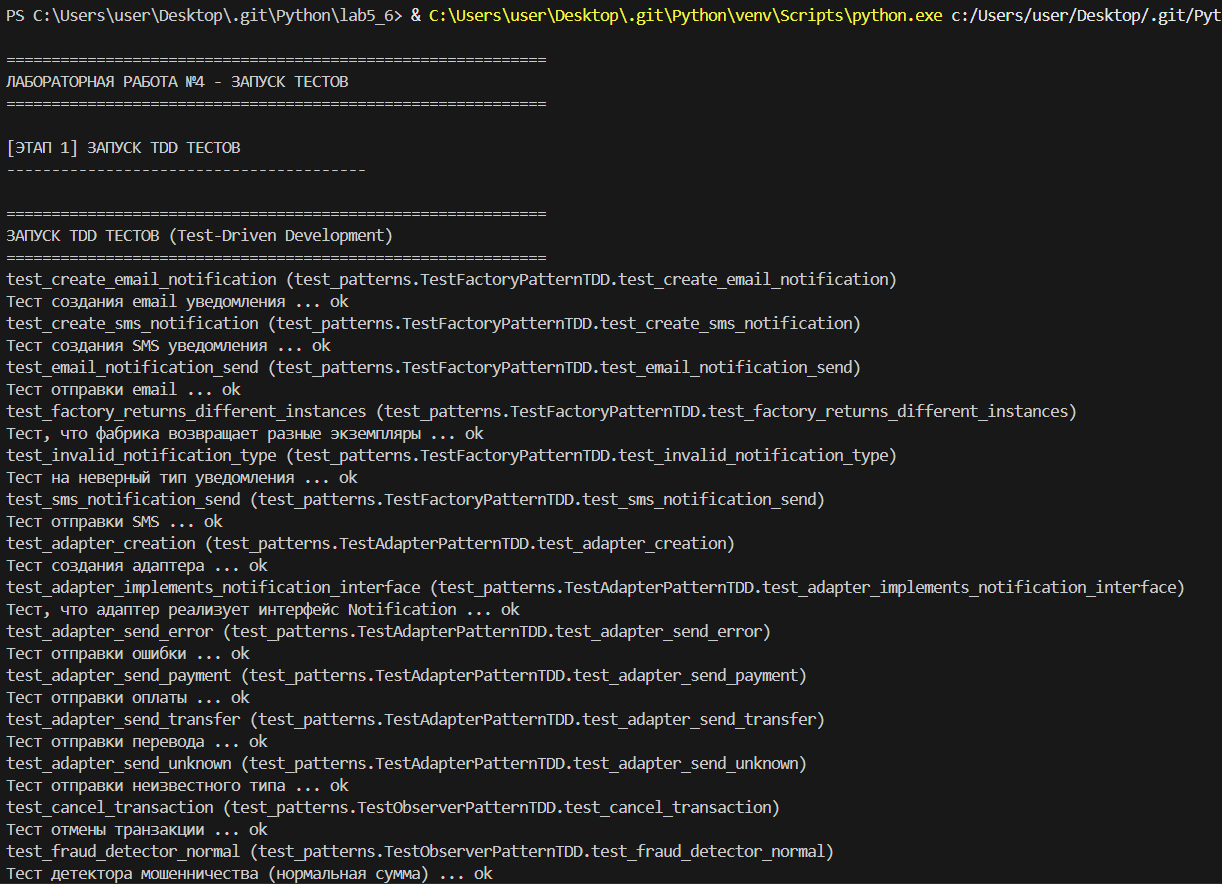

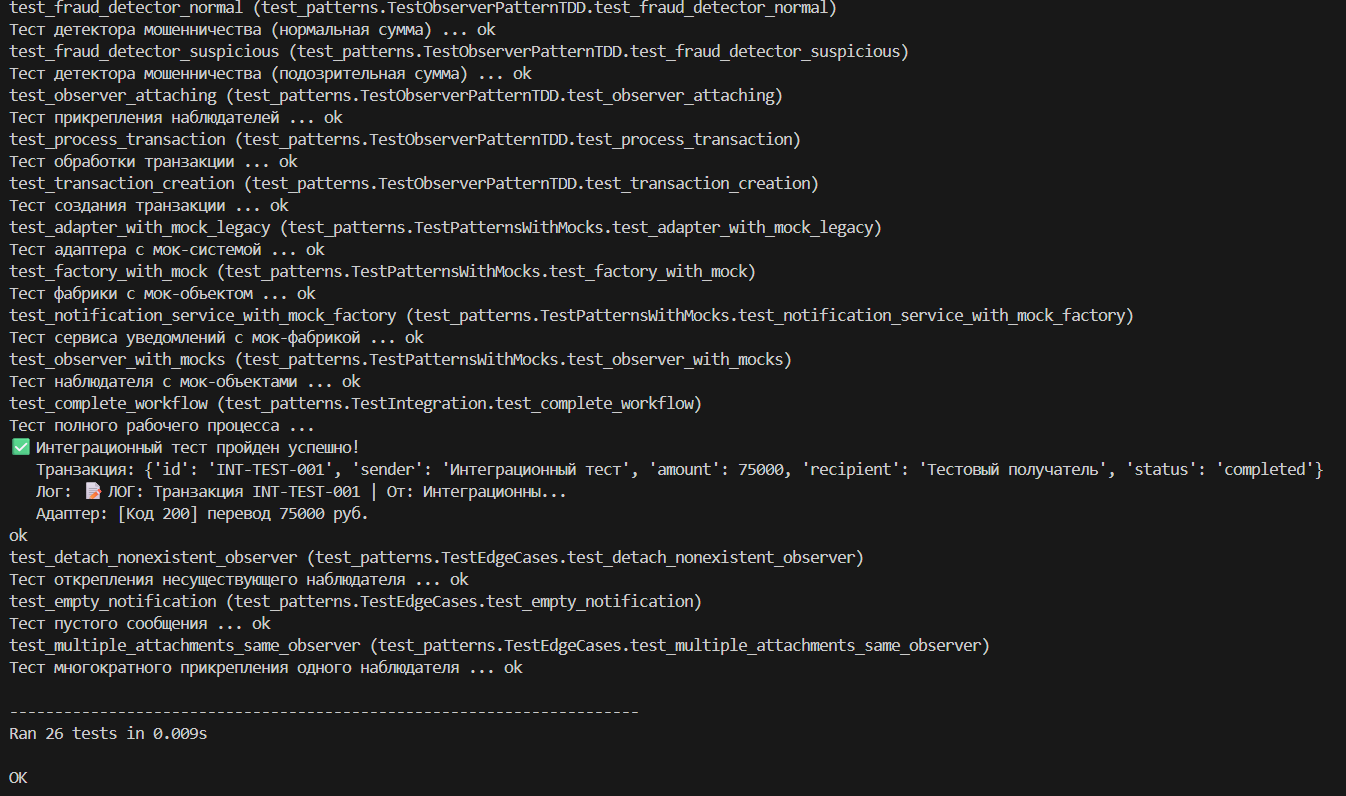

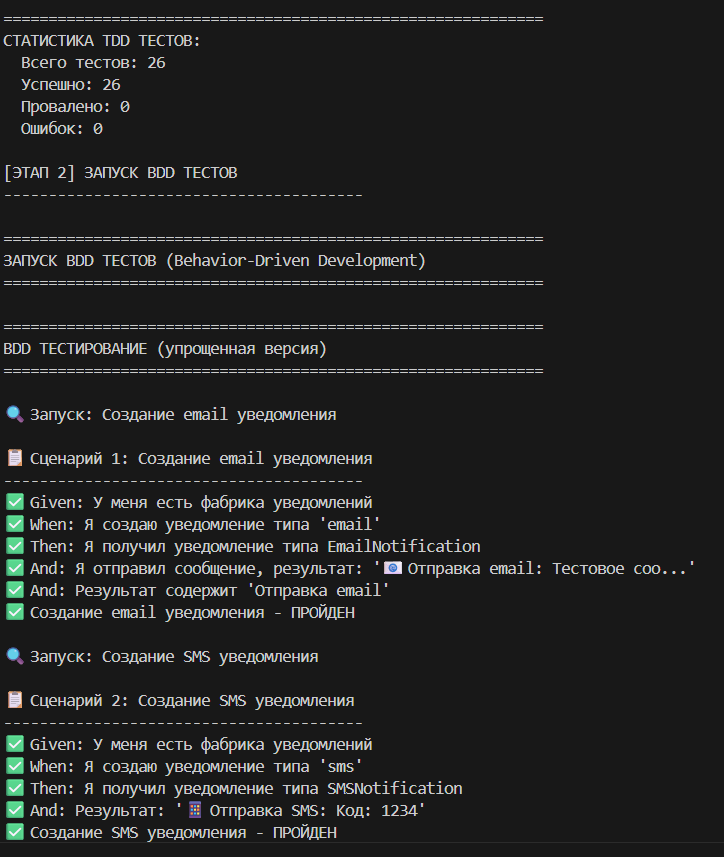

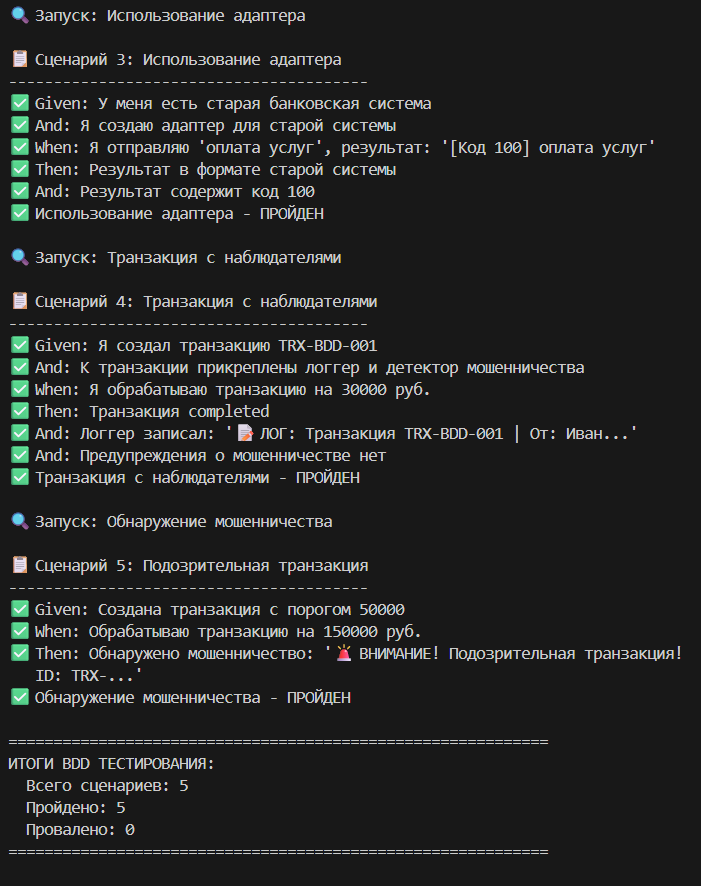

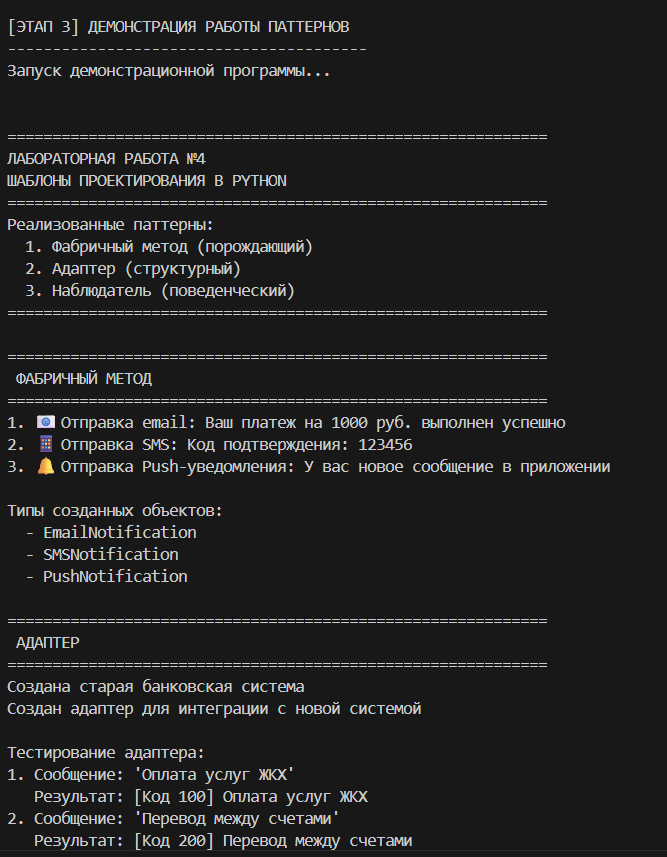

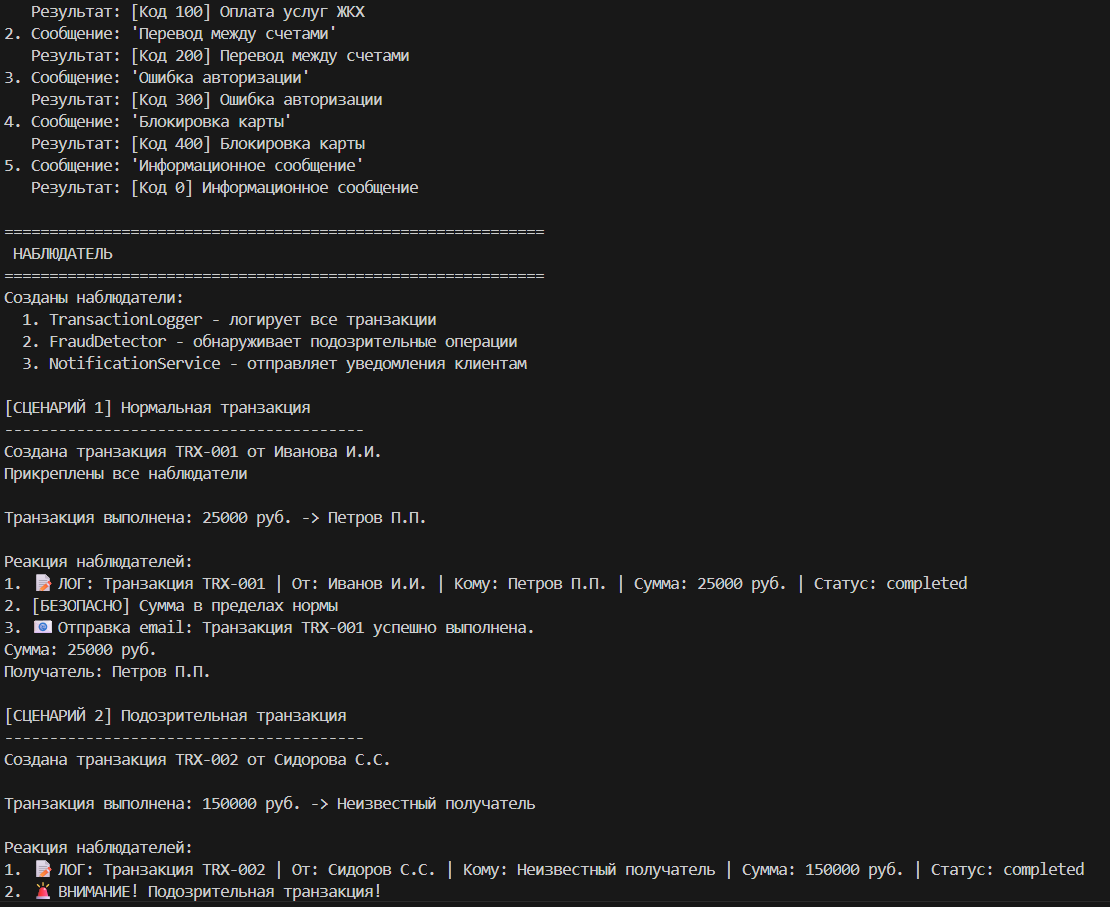

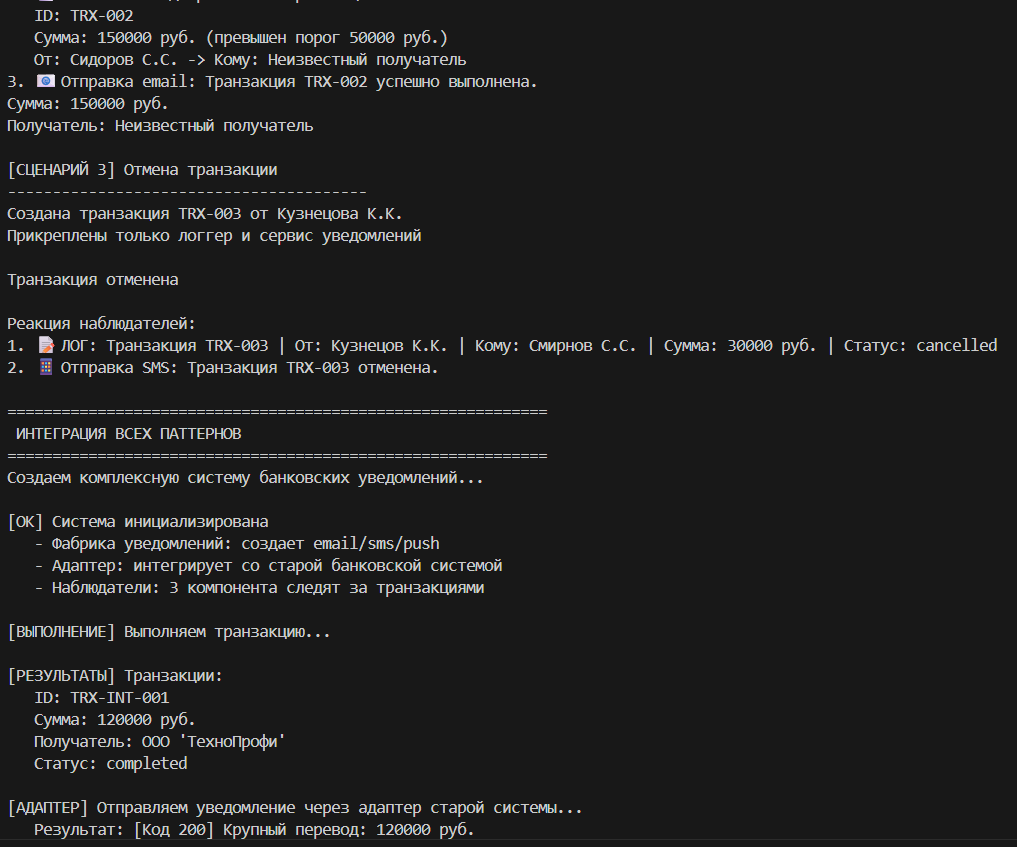

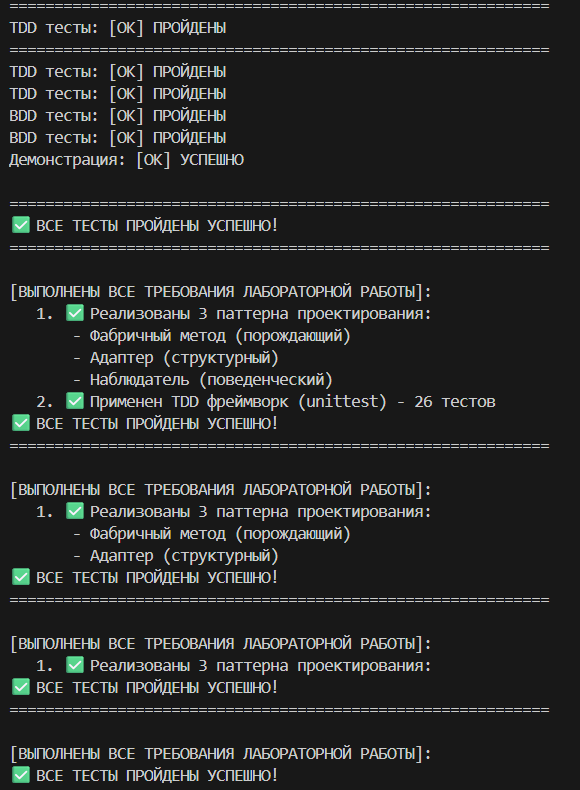